In [ ]:
from sklearn import datasets
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

In [ ]:
x_train = x_data[:-30]
x_test = x_data[-30:]
y_train = y_data[:-30]
y_test = y_data[-30:]

In [ ]:
x_train = tf.cast(x_train,tf.float32)
x_test = tf.cast(x_test,tf.float32)

In [ ]:
train_db = tf.data.Dataset.from_tensor_slices((x_train,y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(32)

In [ ]:
w1 = tf.Variable(tf.random.truncated_normal([4,3],stddev=0.1,seed=1))
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1,seed=1))

In [ ]:
lr = 0.1
train_loss_results = []
test_acc = []
epochs = 500
loss_all = 4

In [ ]:
for epoch in range(epochs):
  for step,(x_train,y_train) in enumerate(train_db):
    with tf.GradientTape() as tape:
      y = tf.matmul(x_train,w1)+b1
      y = tf.nn.softmax(y)
      y_ = tf.one_hot(y_train,depth=3)
      loss = tf.reduce_mean(tf.square(y_-y))
      loss_all += loss.numpy()
    grads = tape.gradient(loss,[w1,b1])

    w1.assign_sub(lr*grads[0])
    b1.assign_sub(lr*grads[1])

  print("Epoch {},loss {}".format(epoch,loss_all/4))
  train_loss_results.append(loss_all/4)
  loss_all = 0


  total_correct,total_number = 0,0
  for x_test,y_test in test_db:
    y = tf.matmul(x_test,w1)+b1
    y = tf.nn.softmax(y)
    pred = tf.argmax(y,axis=1)
    pred = tf.cast(pred,dtype=y_test.dtype)
    correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
    correct = tf.reduce_sum(correct)
    total_correct += int(correct)
    total_number += x_test.shape[0]
  
  acc = total_correct/total_number
  test_acc.append(acc)
  print("Test_acc ",acc)
  

Epoch 0,loss 1.2480711340904236
Test_acc  0.26666666666666666
Epoch 1,loss 0.19996534287929535
Test_acc  0.16666666666666666
Epoch 2,loss 0.19069040566682816
Test_acc  0.26666666666666666
Epoch 3,loss 0.17948604375123978
Test_acc  0.5333333333333333
Epoch 4,loss 0.16958332806825638
Test_acc  0.5333333333333333
Epoch 5,loss 0.16120702028274536
Test_acc  0.5333333333333333
Epoch 6,loss 0.15417569130659103
Test_acc  0.5333333333333333
Epoch 7,loss 0.14826617762446404
Test_acc  0.5333333333333333
Epoch 8,loss 0.143267672508955
Test_acc  0.5333333333333333
Epoch 9,loss 0.1390009168535471
Test_acc  0.5333333333333333
Epoch 10,loss 0.13532095961272717
Test_acc  0.5333333333333333
Epoch 11,loss 0.13211327977478504
Test_acc  0.5333333333333333
Epoch 12,loss 0.12928812764585018
Test_acc  0.5333333333333333
Epoch 13,loss 0.12677527405321598
Test_acc  0.5333333333333333
Epoch 14,loss 0.12451952509582043
Test_acc  0.5333333333333333
Epoch 15,loss 0.12247723340988159
Test_acc  0.5333333333333333
Epo

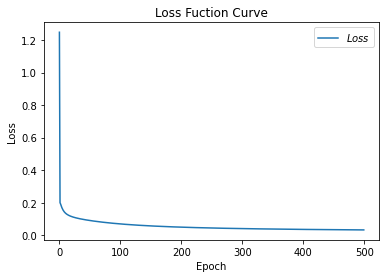

In [ ]:
from matplotlib import pyplot as plt
plt.title("Loss Fuction Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_loss_results,label = "$Loss$")
plt.legend()
plt.show()

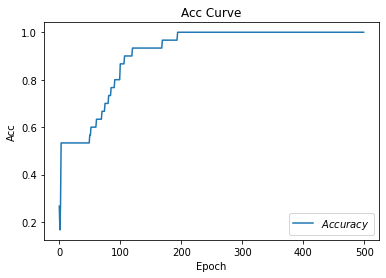

In [ ]:
plt.title("Acc Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.plot(test_acc,label="$Accuracy$")
plt.legend()
plt.show()